<a href="https://colab.research.google.com/github/MJKhadeeja/ML-python-Projects/blob/Linear-Regression/CO2_emission_Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
from google.colab import files
files.upload()

Saving CO2 Emissions_Canada.csv to CO2 Emissions_Canada (1).csv


{'CO2 Emissions_Canada (1).csv': b'Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)\r\nACURA,ILX,COMPACT,2,4,AS5,Z,9.9,6.7,8.5,33,196\r\nACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221\r\nACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9,48,136\r\nACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255\r\nACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244\r\nACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10,28,230\r\nACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232\r\nACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9,11.1,25,255\r\nACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267\r\nACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212\r\nACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225\r\nACURA,TSX,COMPACT,3.5,6,AS5,Z,12.1,8.3,10.4,27,239\r\nALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193\r\nASTON MARTIN,DB9,MINIC

In [ ]:
co2_data=pd.read_csv('CO2 Emissions_Canada.csv')
co2_data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
co2_data.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [ ]:
co2_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
co2_data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
co2_data.shape

(7385, 12)

In [ ]:
co2_data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
co2_data['Make'].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

In [ ]:
co2_data['Model'].value_counts()

F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: Model, Length: 2053, dtype: int64

In [ ]:
co2_data['Vehicle Class'].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

In [ ]:
co2_data['Transmission'].value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

In [ ]:
co2_data['Fuel Type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

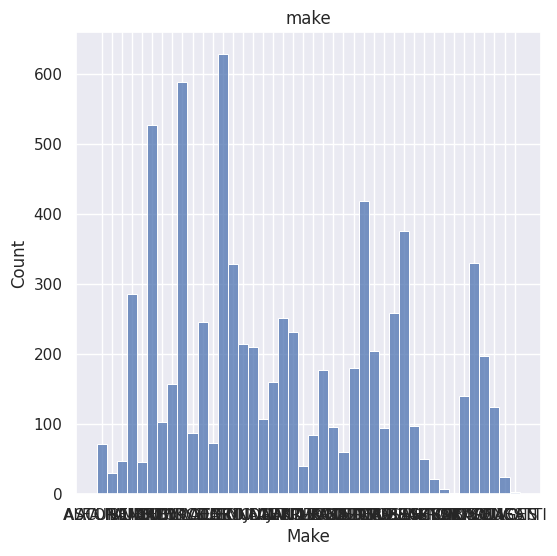

In [ ]:
#distribuion of maker
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Make'])
plt.title('make')
plt.show()

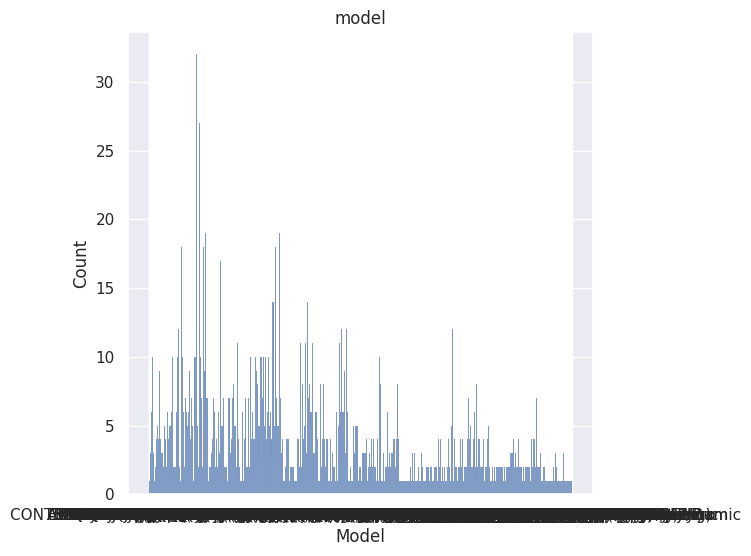

In [ ]:
#model
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Model'])
plt.title('model')
plt.show()

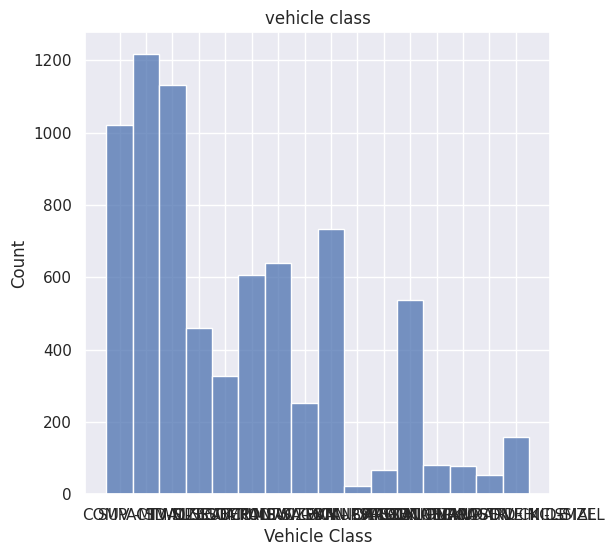

In [ ]:
#vehicle class
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Vehicle Class'])
plt.title('vehicle class')
plt.show()

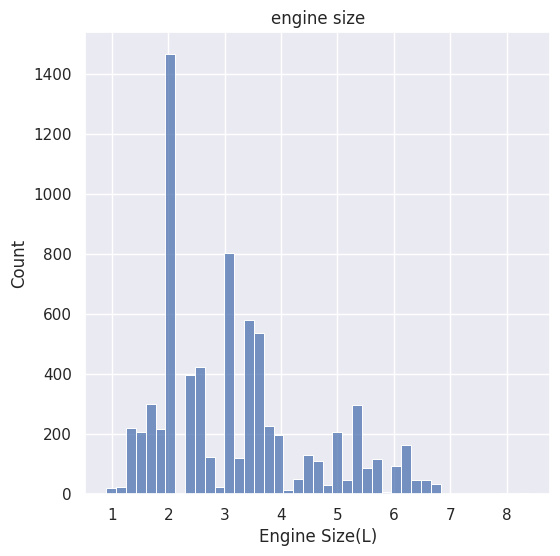

In [ ]:
#engine size
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Engine Size(L)'])
plt.title('engine size')
plt.show()

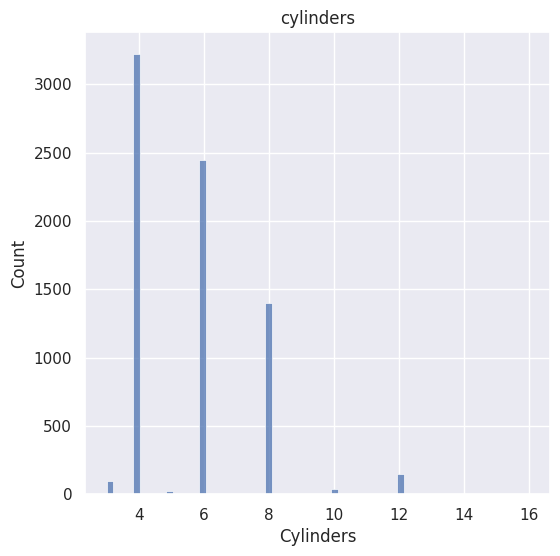

In [ ]:
#cylinders
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Cylinders'])
plt.title('cylinders')
plt.show()

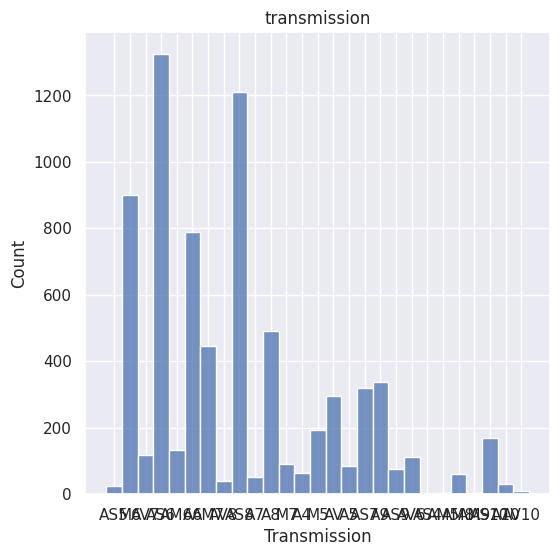

In [ ]:
#transmission
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Transmission'])
plt.title('transmission')
plt.show()

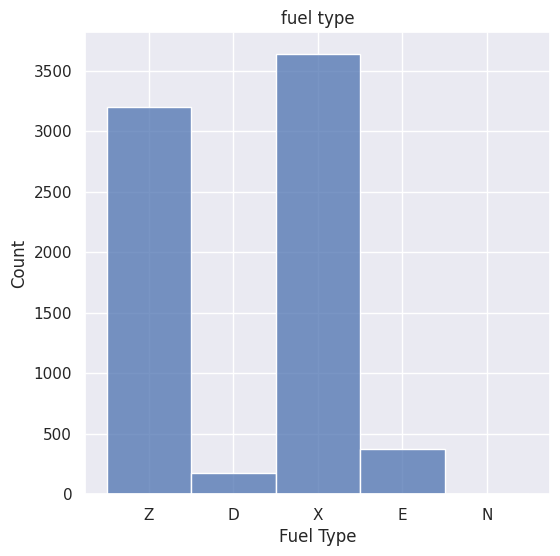

In [ ]:
#fuel type
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Fuel Type'])
plt.title('fuel type')
plt.show()

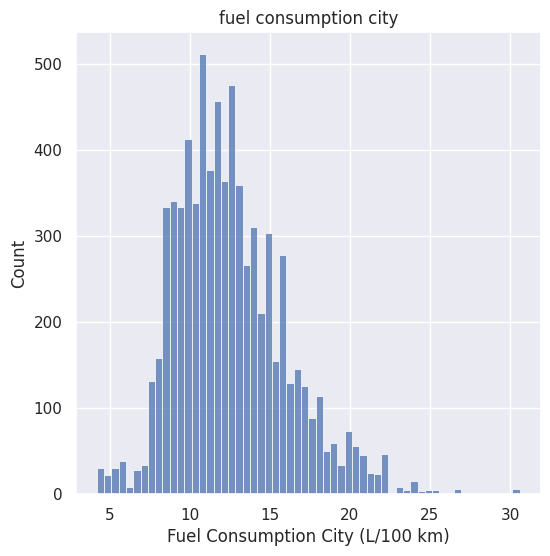

In [ ]:
#fuel consumption city
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Fuel Consumption City (L/100 km)'])
plt.title('fuel consumption city')
plt.show()

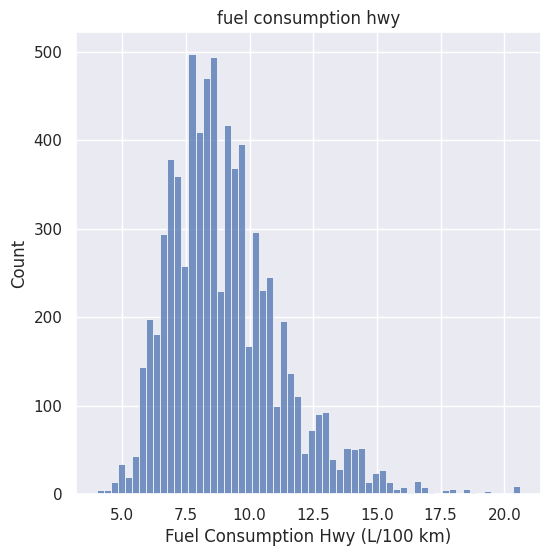

In [ ]:
#fuel consumption hwy
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Fuel Consumption Hwy (L/100 km)'])
plt.title('fuel consumption hwy')
plt.show()

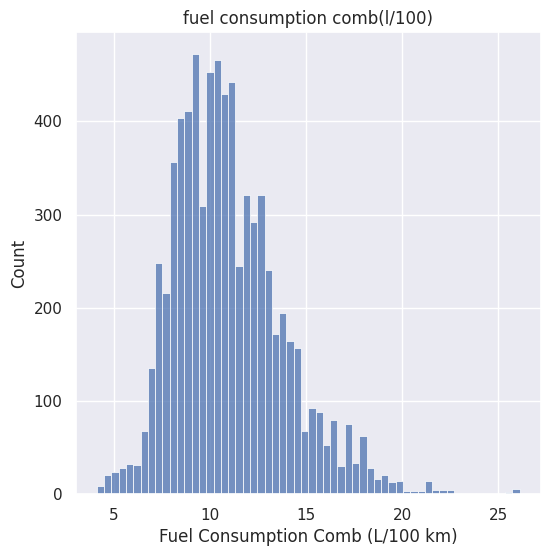

In [ ]:
#fuel consumption comb(L/100)
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Fuel Consumption Comb (L/100 km)'])
plt.title('fuel consumption comb(l/100)')
plt.show()

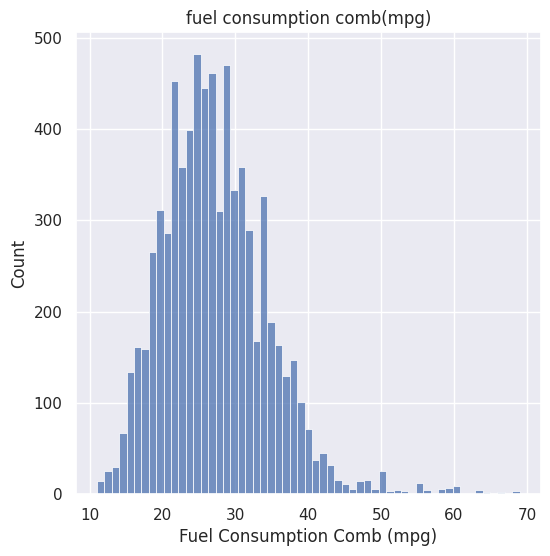

In [ ]:
#fuel consumption comb (mpg)
plt.figure(figsize=(6,6))
sns.histplot(co2_data['Fuel Consumption Comb (mpg)'])
plt.title('fuel consumption comb(mpg)')
plt.show()

In [ ]:
#encoding the vehicle class
co2_data.replace({'Vehicle Class':{'SUV - SMALL':0,'MID-SIZE':1,'COMPACT':2,'SUV - STANDARD':3,'FULL-SIZE':4,'SUBCOMPACT':5,'PICKUP TRUCK - STANDARD':6,'TWO-SEATER':7,'MINICOMPACT':8,'STATION WAGON - SMALL':9,'PICKUP TRUCK - SMALL':10,'MINIVAN':11,'SPECIAL PURPOSE VEHICLE':12,'VAN - PASSENGER':13,'STATION WAGON - MID-SIZE':14,'VAN - CARGO':15}},inplace=True)

#encoding the
co2_data.replace({'Transmission':{'AS6':0,'AS8':1,'M6':2,'A6':3,'A8':4,'AM7':5,'A9':6,'AS7':7,'AV':8,'M5':9,'AS10':10,'AM6':11,'AV7':12,'AV6':13,'M7':14,'A5':15,'AS9':16,'A4':17,'AM8':18,'A7':19,'AV8':20,'A10':21,'AS5':22,'AV10':23,'AM5':24,'AM9':25,'AS4':26}},inplace=True)

#encoding
co2_data.replace({'Fuel Type':{'X':0,'Z':1,'E':2,'D':3,'N':4}},inplace=True)


In [ ]:
x=co2_data.drop(columns=['Make','Model','CO2 Emissions(g/km)'],axis=1)
y=co2_data['CO2 Emissions(g/km)']

In [ ]:
print(x)

      Vehicle Class  Engine Size(L)  Cylinders  Transmission  Fuel Type  \
0                 2             2.0          4            22          1   
1                 2             2.4          4             2          1   
2                 2             1.5          4            12          1   
3                 0             3.5          6             0          1   
4                 0             3.5          6             0          1   
...             ...             ...        ...           ...        ...   
7380              0             2.0          4             1          1   
7381              0             2.0          4             1          1   
7382              0             2.0          4             1          1   
7383              3             2.0          4             1          1   
7384              3             2.0          4             1          1   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
0                       

In [ ]:
print(y)

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(7385, 9) (5908, 9) (1477, 9)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(7385,) (5908,) (1477,)


In [ ]:
print(x_train)

      Vehicle Class  Engine Size(L)  Cylinders  Transmission  Fuel Type  \
7220              7             3.7          6             7          1   
7305              4             2.5          4            20          0   
5799              7             3.5          6             5          1   
5343              4             6.6         12             1          1   
6883              6             5.3          8            21          0   
...             ...             ...        ...           ...        ...   
3606              4             6.4          8             4          1   
5704              1             6.2          8             4          1   
6637              3             4.4          8             1          1   
2575              3             2.3          4             0          0   
7336              7             3.0          6             1          1   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
7220                    

In [ ]:
print(y_train)

7220    261
7305    185
5799    402
5343    397
6883    298
       ... 
3606    302
5704    339
6637    318
2575    253
7336    208
Name: CO2 Emissions(g/km), Length: 5908, dtype: int64


In [ ]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predicting on training model
training_data_predict = regression.predict(x_train)

In [ ]:
#r squared value
r2_train=metrics.r2_score(y_train,training_data_predict)
print('r squared value:',r2_train)

r squared value: 0.9083150312920308


In [ ]:
#predicting on test data
test_data_predict=regression.predict(x_test)

In [ ]:
#r squared value
r2_test=metrics.r2_score(y_test,test_data_predict)
print('r squared value:',r2_test)

r squared value: 0.9151578341000087


In [ ]:
x_test.to_csv('co2_data.csv',index=False)
from google.colab import files
files.download('co2_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_data=(5,3.0,6,2,1,11.9,8.6,10.4,27)

input_data_array=np.array(input_data)

input_data_reshaped=input_data_array.reshape(1,-1)

prediction=regression.predict(input_data_reshaped)
print(prediction[0])

print('CO2 emission is',prediction[0])

249.96533347140203
CO2 emission is 249.96533347140203


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
